In [23]:
import numpy as np

In [24]:
import cv2

In [25]:
!pip install dlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
!pip install cmake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import dlib,math

In [28]:
from matplotlib import pyplot as plt

In [29]:
%matplotlib inline

In [30]:
face = '/content/sel.jpg'
face_origin = cv2.imread(face)
face_copy = face_origin.copy()

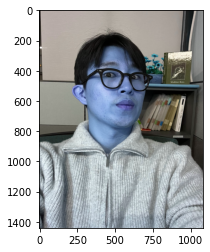

In [31]:
plt.imshow(face_copy)

# opencv는 BGR순으로 이미지를 읽는다

In [32]:
plt.show()

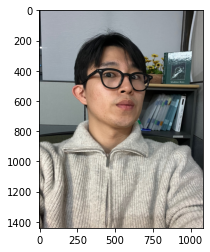

In [33]:
face_rgb = cv2.cvtColor(face_copy, cv2.COLOR_BGR2RGB)
plt.imshow(face_rgb)
plt.show()

# 이렇게 함으로써 RGB순으로 이미지를 읽을 수 있게 한다.

In [34]:
# Call detector

detector = dlib.get_frontal_face_detector()

# Recognize face with rectangle

dlib_rects = detector(face_rgb,1)

dlib_rects

rectangles[[(348, 297) (810, 759)]]

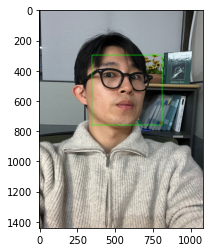

In [35]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(face_copy, (l,t),(r,b),(0,255,0),2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(face_copy, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [39]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d /content/shape_predictor_68_face_landmarks.dat.bz2

--2023-03-23 16:56:56--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  29.0MB/s    in 2.1s    

2023-03-23 16:56:58 (29.0 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [40]:
model_path = '/content/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [42]:
list_landmarks = []
# find all face landmark explained the paper above
for dlib_rect in dlib_rects:
    points = landmark_predictor(face_rgb, dlib_rect)
    # face landmark location
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


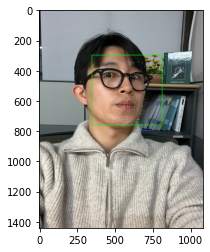

In [43]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(face_copy, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(face_copy, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [44]:
list_landmarks[0][:10]

[(294, 475),
 (300, 531),
 (310, 586),
 (326, 638),
 (356, 680),
 (401, 714),
 (453, 739),
 (510, 759),
 (564, 768),
 (611, 757)]

In [47]:
from google.colab.patches import cv2_imshow

In [ ]:
cv2_imshow((face_copy))

In [49]:
# nose 좌표

for dlib_rect, landmark in zip(dlib_rects,list_landmarks):
    print("Nose index:", landmark[30]) # nose index 
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height() // 2
    w = h = dlib_rect.width()
    # position of nose
    print ('(x,y) : (%d,%d)'%(x,y))
    # pic rate
    print ('(w,h) : (%d,%d)'%(w,h))


Nose index: (592, 510)
(x,y) : (592,279)
(w,h) : (463,463)


In [53]:
# mouse 좌표

for dlib_rect, landmark in zip(dlib_rects,list_landmarks):
    print("lips index:", landmark[62]) # lips index 
    x = landmark[62][0]
    y = landmark[62][1] + dlib_rect.height() // 2 
    w = h = dlib_rect.width()
    # position of nose
    print ('(x,y) : (%d,%d)'%(x,y))
    # pic rate
    print ('(w,h) : (%d,%d)'%(w,h))


lips index: (581, 628)
(x,y) : (581,859)
(w,h) : (463,463)
